In [1]:
from utils import Song
import librosa
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
beatles = Song('data/A#-Major-3.wav')
print(beatles.x.shape)
S = np.abs(librosa.stft(beatles.x, n_fft=4096))**2
print(S.shape)
chroma = librosa.feature.chroma_stft(S=S, sr=beatles.sample_rate)
print(chroma.shape)


(264600,)
(2049, 259)
(12, 259)


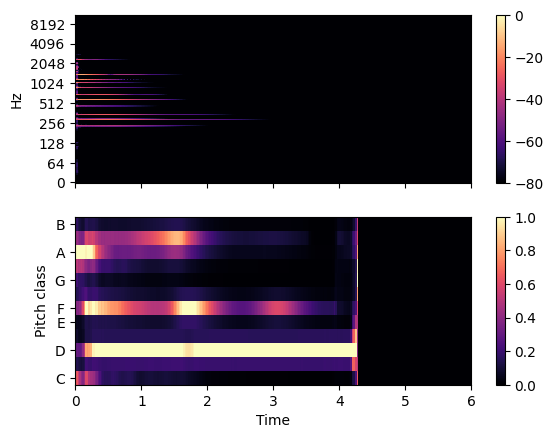

In [85]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

In [86]:
templates = json.load(open('chord_templates.json'))

In [87]:
N = len(templates.keys())
chord_matrix = np.zeros((N, 12))
index_to_chord = {}
for i, key in enumerate(templates.keys()):
    chord_matrix[i] = templates[key]
    index_to_chord[i] = key
print(chord_matrix)
print(index_to_chord)

[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]
{0: 'A#m', 1: 'C#m', 2: 'A#', 3: 'Dm', 4: 'C#', 5: 'Bm', 6: 'G#

In [88]:
chroma[:, 0]

array([0.43543005, 0.09672001, 0.18834507, 0.11390506, 0.05926711,
       0.26651248, 0.19022936, 0.38417897, 0.68883485, 1.        ,
       0.40208757, 0.16663828], dtype=float32)

In [89]:
def cossim(vector, chord_matrix):
    N = chord_matrix.shape[0]
    out = np.zeros(N)
    for i in range(N):
        chord = chord_matrix[i]
        # out[i] = np.dot(vector, chord)/(np.linalg.norm(vector)*np.linalg.norm(chord))
        out[i] = np.correlate(vector, chord)
    return out

In [90]:
for i in range(chroma.shape[1]):
    chord_scores = cossim(chroma[:, i], chord_matrix)
    chord_idx = np.argmax(chord_scores)
    print(index_to_chord[chord_idx])

F
F
F
F
F
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
A#
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
Dm
A#
A#
A#
A#
A#
A#
A#
A#
Dm
Dm
A#
A#
A#
A#
Fm
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m
A#m


'G'

In [4]:
import chord_detection_spectral as cd

cd.chord_detect_chromagram(beatles, np.array([0, 0.25, 0.5, 1, 1.5, 2, 2.5, 3]))

(array([ 8., 17.,  1.,  1.,  1.,  1.,  1.,  1.]),
 ['F', 'Dm', 'A#', 'A#', 'A#', 'A#', 'A#', 'A#'])